In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV


In [2]:
Diabetes_dataset = pd.read_csv('diabetes.csv')

# Data Analyzing:

In [3]:
Diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
Diabetes_dataset.shape

(768, 9)

In [6]:
Diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
Diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
Diabetes_dataset.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

So here we are seeing, there is no columns containing null values.
And all are numerical features. 

# Exploratory Data Analysis 

In [9]:
def Dist_plot(features):
    ax = sns.distplot(Diabetes_dataset[features], label = 'Pregnancies')

In [10]:
def Kde_plot(features):
    
    sns.kdeplot(Diabetes_dataset[features][(Diabetes_dataset['Outcome'] == 0)],
            color = 'Red', shade = True, Label = 'No Diabetes')

    sns.kdeplot(Diabetes_dataset[features][(Diabetes_dataset['Outcome'] == 1)],
            color = 'Blue', shade = True, Label = 'Diabetes')

    plt.title(features + ' distribution on Outcome')
    plt.xlabel(features)
    plt.ylabel('Probability Density')
    

## Pregnancies:

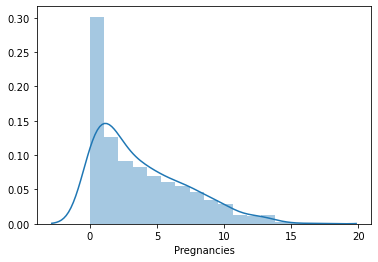

In [11]:
Dist_plot('Pregnancies')


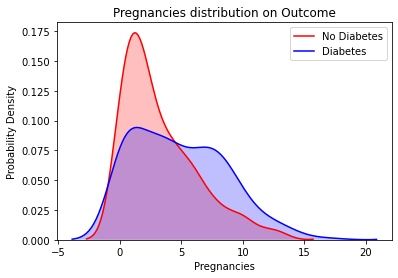

In [12]:
Kde_plot('Pregnancies')

## Glucose

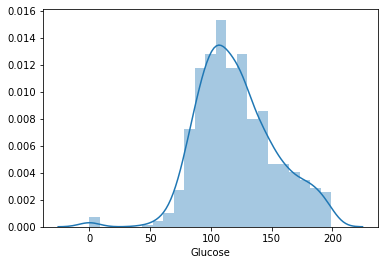

In [13]:
Dist_plot('Glucose')

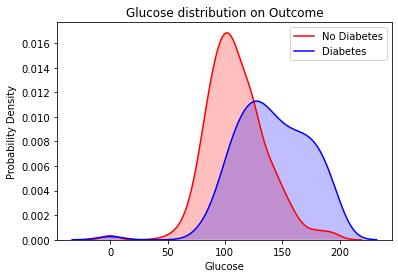

In [14]:
Kde_plot('Glucose')

## BloodPressure

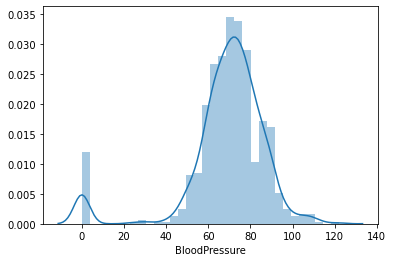

In [15]:
Dist_plot('BloodPressure')

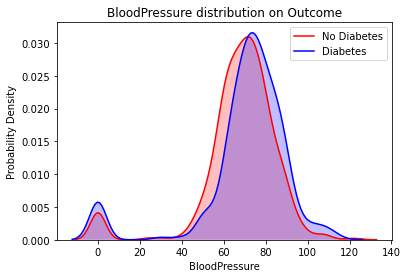

In [16]:
Kde_plot('BloodPressure')

## SkinThickness

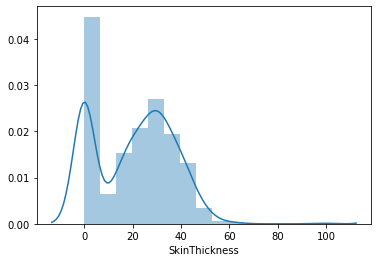

In [17]:
Dist_plot('SkinThickness')

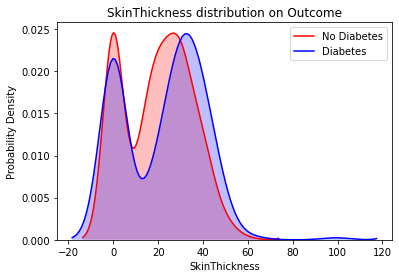

In [18]:
Kde_plot('SkinThickness')

# Insulin

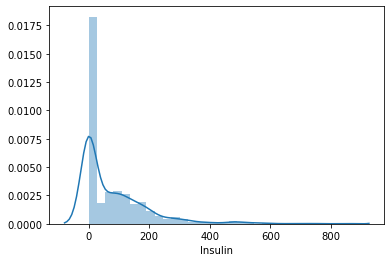

In [19]:
Dist_plot('Insulin')

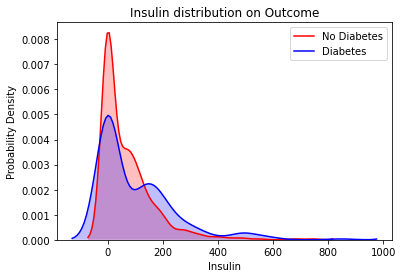

In [20]:
Kde_plot('Insulin')

## BMI

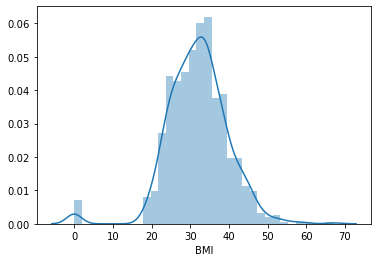

In [21]:
Dist_plot('BMI')

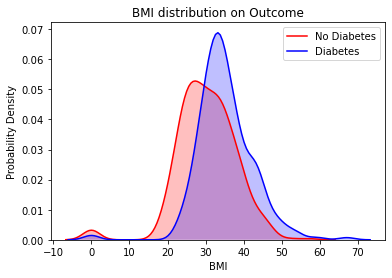

In [22]:
Kde_plot('BMI')

## DiabetesPedigreeFunction

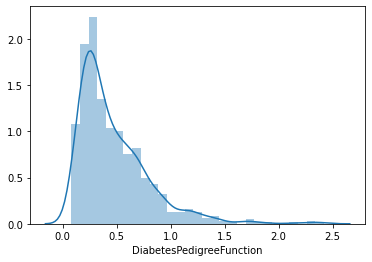

In [23]:
Dist_plot('DiabetesPedigreeFunction')

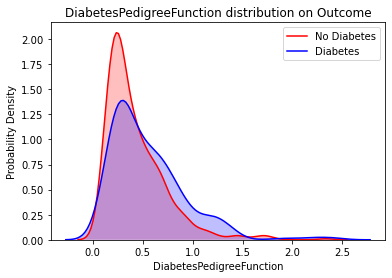

In [24]:
Kde_plot('DiabetesPedigreeFunction')

## Age

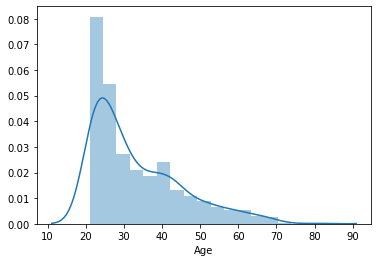

In [25]:
Dist_plot('Age')

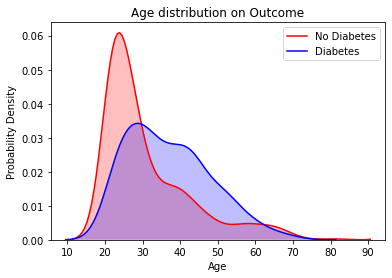

In [26]:
Kde_plot('Age')

# Feature Engineering:

We have seen that , Almost every features contain 0 as a value .But some 
features cann't be zero.So let's impute those values with mean value

In [27]:
#First see how many numbers of 0 are present in the each columns.
print("Total numbers of rows : (0)".format(len(Diabetes_dataset)))

print('Number of rows in pregnancis columns: ', int((len(Diabetes_dataset.loc[Diabetes_dataset['Pregnancies'] == 0]))))
print('Number of rows in Glucose columns: ', int((len(Diabetes_dataset.loc[Diabetes_dataset['Glucose'] == 0]))))
print('Number of rows in BloodPressure columns: ', int((len(Diabetes_dataset.loc[Diabetes_dataset['BloodPressure'] == 0]))))
print('Number of rows in SkinThickness: ', int((len(Diabetes_dataset.loc[Diabetes_dataset['SkinThickness'] == 0]))))

print('Number of rows in Insulin columns: ', int((len(Diabetes_dataset.loc[Diabetes_dataset['Insulin'] == 0]))))
print('Number of rows in BMI columns: ', int((len(Diabetes_dataset.loc[Diabetes_dataset['BMI'] == 0]))))
print('Number of rows in DiabetesPedigreeFunction: ', int((len(Diabetes_dataset.loc[Diabetes_dataset['DiabetesPedigreeFunction'] == 0]))))

Total numbers of rows : (0)
Number of rows in pregnancis columns:  111
Number of rows in Glucose columns:  5
Number of rows in BloodPressure columns:  35
Number of rows in SkinThickness:  227
Number of rows in Insulin columns:  374
Number of rows in BMI columns:  11
Number of rows in DiabetesPedigreeFunction:  0


# Train_test_Split

In [28]:
X = Diabetes_dataset.drop(['Outcome'], axis = 1)
y = Diabetes_dataset['Outcome']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values = 0, strategy = 'mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test) 

# Modeling:

In [36]:
def test_eval(clf_model, X_test, y_test, algo=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
          
    
    return algo,precision,recall,f1
    

In [35]:
model_params = {

    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']

         }
    },
    'logisticregression': {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,6,10],
            'penalty': ['l1', 'l2']
        }
    },
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }
        
    }
    
}

In [37]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():

    clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
    clf.fit(X_train, y_train)
    clf_best = clf.best_estimator_
       

    print('='*60)
    output.append(test_eval(clf_best, X_test, y_test, model))

Confusion Matrix
[[81 18]
 [19 36]] 

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154
 

AUC-ROC
0.8312213039485766


C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix
[[82 17]
 [20 35]] 

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154
 

AUC-ROC
0.8207529843893481
Confusion Matrix
[[81 18]
 [19 36]] 

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154
 

AUC-ROC
0.749403122130395


In [38]:
result = pd.DataFrame(output, columns = ['Model','Precision','Recall', 'F1-score'])

In [39]:
result

,Model,Precision,Recall,F1-score
0,random-forest,0.666667,0.654545,0.660550
1,logisticregression,0.673077,0.636364,0.654206
2,decision_tree,0.666667,0.654545,0.660550
